# Ayudantía 8 Programación como Herramienta para Ingeniería 
# Ejercicio 1 Capitulo 4

diego.herrerag00@uc.cl

## Misión 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd

chile_urbanos = gpd.read_file('data/Areas Urbanas/areas_urbanas.shp')

chile_urbanos.head(10)


,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."
5,Arica,Ciudad,39931.465240,2.150982e+07,"POLYGON ((363189.134 7961890.925, 363424.226 7..."
6,Iquique,Ciudad,64442.900734,2.464536e+07,"MULTIPOLYGON (((378467.969 7764956.000, 378467..."
7,Tocopilla,Ciudad,18321.064000,4.465189e+06,"POLYGON ((376927.626 7558000.679, 377009.490 7..."
8,Mejillones,Ciudad,17400.058444,7.553972e+06,"POLYGON ((355461.344 7446261.209, 355498.385 7..."
9,Taltal,Ciudad,7610.917978,2.074163e+06,"POLYGON ((351357.497 7190359.826, 351805.344 7..."


In [3]:
santiago_urbano = chile_urbanos[chile_urbanos['NOMBRE'] == 'Santiago']
santiago_urbano.head(10)

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
385,Santiago,Ciudad,427491.444262,5.821041e+08,"MULTIPOLYGON (((338445.291 6306151.222, 338289..."


<Axes: >

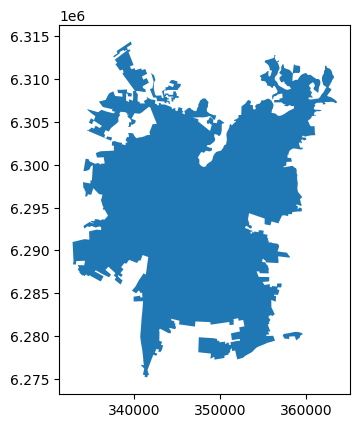

In [4]:
santiago_urbano.plot()

In [5]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

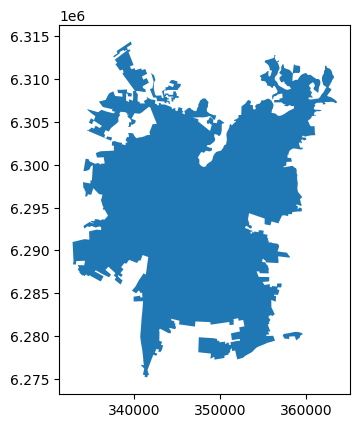

In [6]:
santiago_urbano.plot();

Como podemos ver, según la base de datos que tenemos, solo tenemos el area urbana de Santiago, no la tenemos clasificada según sus nivel socioeconomico: E, D, C3, C2 y ABC1. Por lo tanto, haremos una intersección con alguno de los archivos que si contenga esa información. 

Para intersectar nuestro dataframe con otro y luego, poder visualizarlo. GeoPandas incluye dos metodologías de intersección, los pueden consultar en los siguientes enlances:

- Operaciones con **Overlay** ([Link](https://geopandas.org/set_operations.html))
- Operaciones con **sjoin** ([Link](https://geopandas.org/mergingdata.html))

En este caso realizaremos la intersección con overlay.

Analizando la carpeta de la data, tenemos que esa información está en el archivo `Dsitritos Censales`, cuyo archivo es `Distritos Censales RM.shp`.

In [7]:
distritos = gpd.read_file('data/Distritos Censales/Distritos Censales RM.shp')
distritos.head(6)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."
5,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Portales,1310106.0,81.0,741.0,1268.0,1096.0,151.0,3337.0,618570.13,53.95,8.91,"POLYGON ((344853.057 6298944.840, 344856.320 6..."


In [8]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
santiago_urbano = santiago_urbano.to_crs(32719)

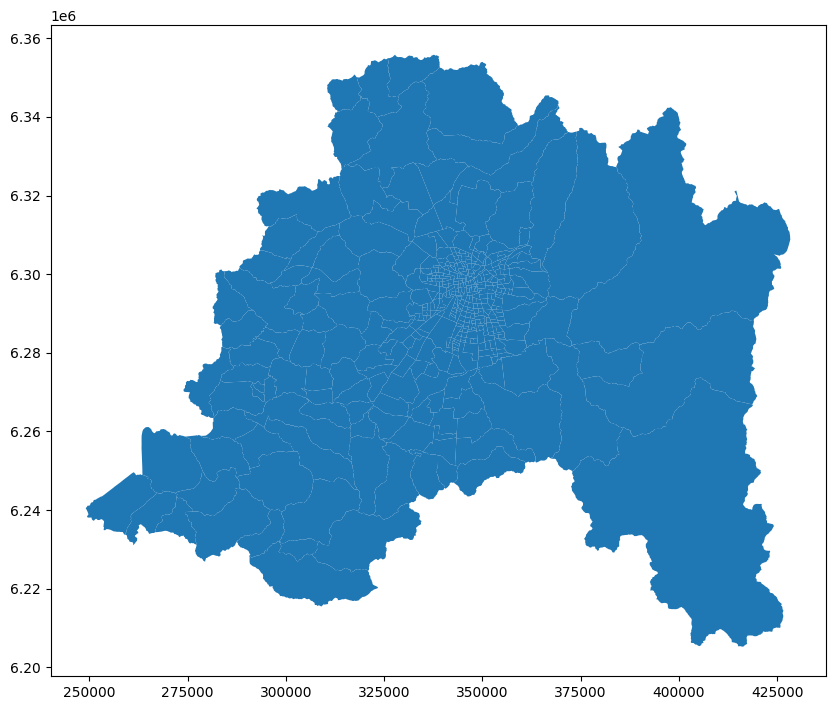

In [11]:
distritos.plot(figsize = (10,10));

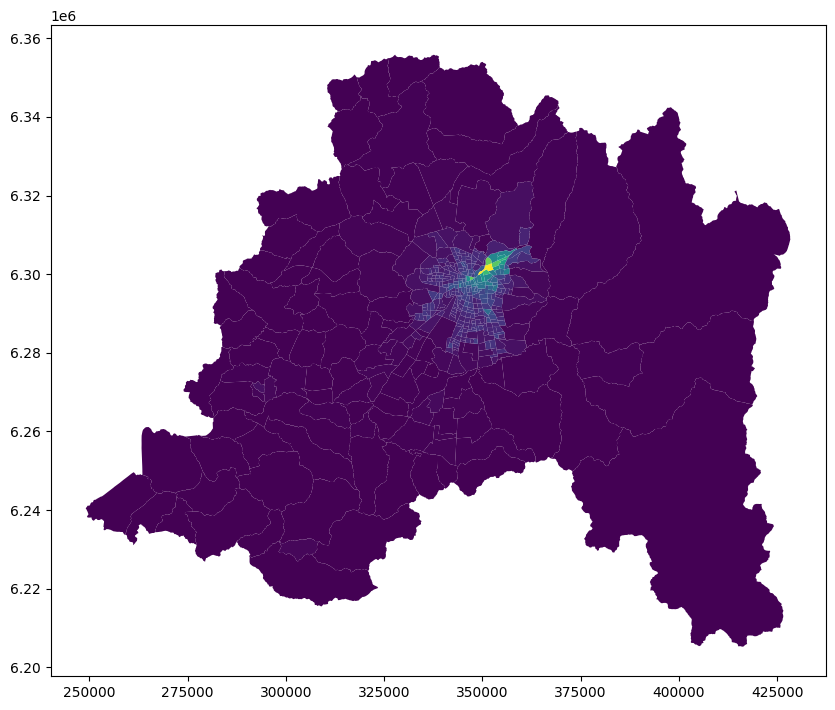

In [12]:
distritos.plot(column = '1_UF_M2', figsize = (10,10));

Ahora que tenemos los dos data frames, haremos la intersección con Overlay

In [13]:
distritos.columns

Index(['NOM_REG', 'COD_PROV', 'NOM_PROV', 'COD_COM', 'NOM_COM', 'NOM_DIS',
       'CODIGO', 'E', 'D', 'C3', 'C2', 'ABC1', 'ADIMARK_T', 'Area', 'Densidad',
       '1_UF_M2', 'geometry'],
      dtype='object')

In [14]:
distritos.head(5)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [15]:
def nivel_socioeconomico(fila):
    total = fila['ADIMARK_T']
    
    porcentaje_E_D = (fila['E'] + fila['D']) / total
    porcentaje_C3_C2 = (fila['C3'] + fila['C2']) / total
    porcentaje_ABC1 = fila['ABC1'] / total

    if porcentaje_E_D >= 0.6:
        return 'Bajo'
    elif porcentaje_C3_C2 >= 0.5:
        return 'Medio'
    elif porcentaje_C3_C2 >= 0.4 and porcentaje_E_D >= 0.3:
        return 'Medio'

    elif porcentaje_C3_C2 >= 0.35 and porcentaje_E_D >= 0.2:
        return 'Medio'

    elif porcentaje_ABC1 >= 0.5:
        return 'Alto'
    elif porcentaje_ABC1 >= 0.4 and porcentaje_E_D < 0.2:
        return 'Alto'   
    elif porcentaje_ABC1 >= 0.4 and porcentaje_C3_C2 >= 0.5 and porcentaje_E_D >= 0.1:
        return 'Medio'
    else:
        return 'Sin Clasificación'

distritos['nivel_socioeconomico'] = distritos.apply(nivel_socioeconomico, axis=1)
distritos.head(10)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,nivel_socioeconomico
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",Medio
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",Medio
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",Medio
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",Medio
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",Medio
5,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Portales,1310106.0,81.0,741.0,1268.0,1096.0,151.0,3337.0,618570.13,53.95,8.91,"POLYGON ((344853.057 6298944.840, 344856.320 6...",Medio
6,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Matucana,1310107.0,50.0,602.0,812.0,559.0,98.0,2121.0,556810.27,38.09,7.50,"POLYGON ((344068.795 6300113.777, 344120.709 6...",Medio
7,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Saturnino,1310108.0,97.0,810.0,1078.0,910.0,162.0,3057.0,668277.97,45.74,6.35,"POLYGON ((344555.979 6299948.258, 344776.355 6...",Medio
8,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Mapocho,1310109.0,127.0,868.0,1167.0,762.0,148.0,3072.0,817926.27,37.56,7.45,"POLYGON ((344571.742 6300151.728, 344916.682 6...",Medio
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,1674.0,444.0,3765.0,592695.23,63.52,18.44,"POLYGON ((347488.430 6298672.836, 347569.109 6...",Medio


In [16]:
distritos['nivel_socioeconomico'].value_counts()

nivel_socioeconomico
Medio    343
Bajo     100
Alto       6
Name: count, dtype: int64

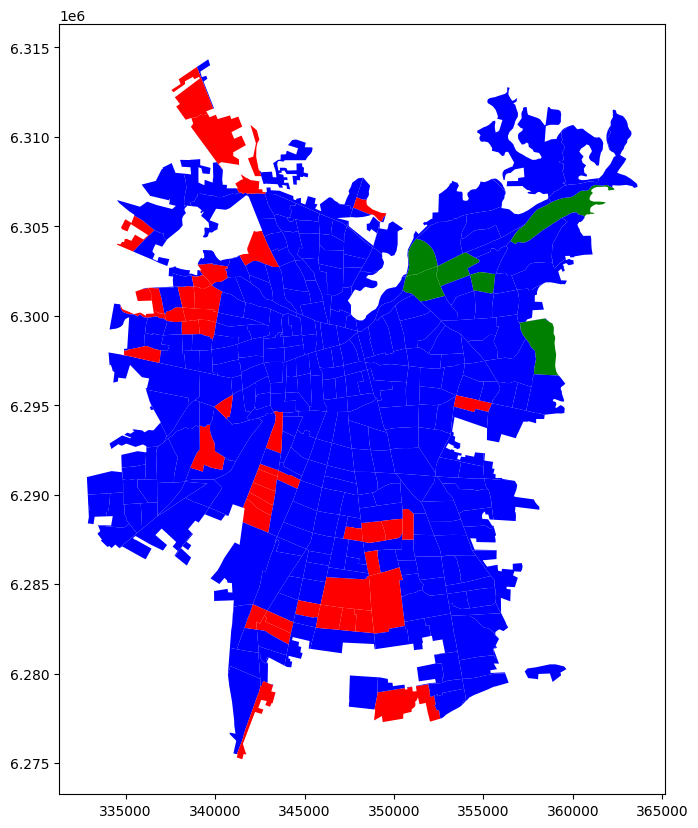

In [17]:
# Cada nivel socioeconómico tiene un color asignado: rojo, celeste y verdesacame este warning
# .

colors = {
    'Bajo': 'red',
    'Medio': 'blue',
    'Alto': 'green',
    'Sin Clasificación': 'lightgrey'
}

distritos_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection')
distritos_urbano.plot(figsize = (10,10), column = 'nivel_socioeconomico', legend = True, color = distritos_urbano['nivel_socioeconomico'].map(colors));

# Misión 2

In [18]:
lineas_metro = gpd.read_file('data/Metro 2020/Lineas_2020/Lineas_2020.shp')
lineas_metro.head()

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (-70.66142 -33.52651, -70.66325 -33..."
1,4,2,L2,18315.942,20087.016072,1057.384032,"LINESTRING (-70.65881 -33.51723, -70.66138 -33..."
2,5,2,L2,18315.942,20087.016072,802.130950,"LINESTRING (-70.65682 -33.51020, -70.65865 -33..."
3,6,2,L2,18315.942,20087.016072,599.761286,"LINESTRING (-70.65315 -33.49734, -70.65346 -33..."
4,7,2,L2,18315.942,20087.016072,866.182956,"LINESTRING (-70.65465 -33.50260, -70.65679 -33..."


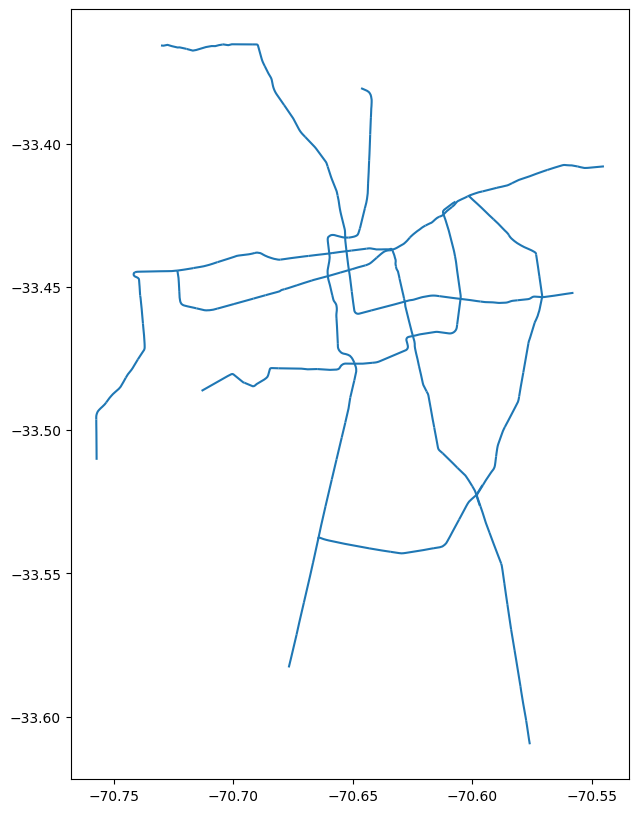

In [19]:
lineas_metro.plot(figsize = (10,10));

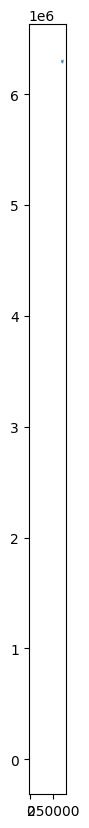

In [20]:
# Guardamos nuestro primer gráfico en una variable
ax = distritos_urbano.plot(figsize = (10,10))

# Usamos esa variable (que es un axes) y construímos el segundo gráfico con el anterior como base
# Es importante que le cambiemos el color para que se puedan visualizar sin problemas.
lineas_metro.plot(ax = ax, figsize = (10,10), color = 'red');

In [21]:
distritos_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
lineas_metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
# Actualizamos el sistema de coordenadas de las líneas del metro a UTM19S, 
# el mismo formato que tiene distritos_urbano, para poder intersectarlos. 
lineas_metro = lineas_metro.to_crs(32719)

In [24]:
lineas_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

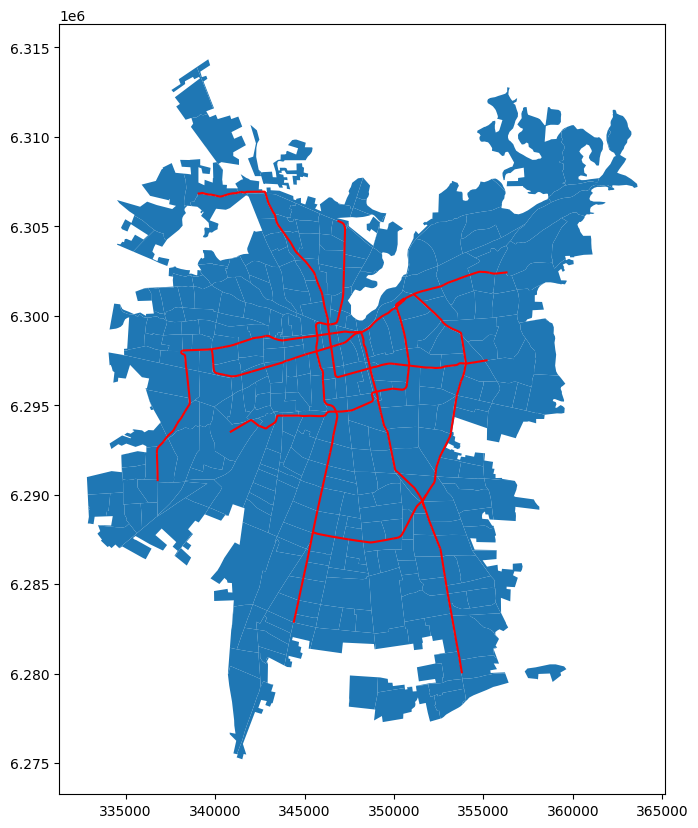

In [25]:
# Guardamos nuestro primer gráfico en una variable
ax = distritos_urbano.plot(figsize = (10,10));

# Usamos esa variable (que es un axes) y construímos el segundo gráfico con el anterior como base
# Es importante que le cambiemos el color para que se puedan visualizar sin problemas.
lineas_metro.plot(ax = ax, figsize = (10,10), color = 'red');

In [26]:
colors

{'Bajo': 'red',
 'Medio': 'blue',
 'Alto': 'green',
 'Sin Clasificación': 'lightgrey'}

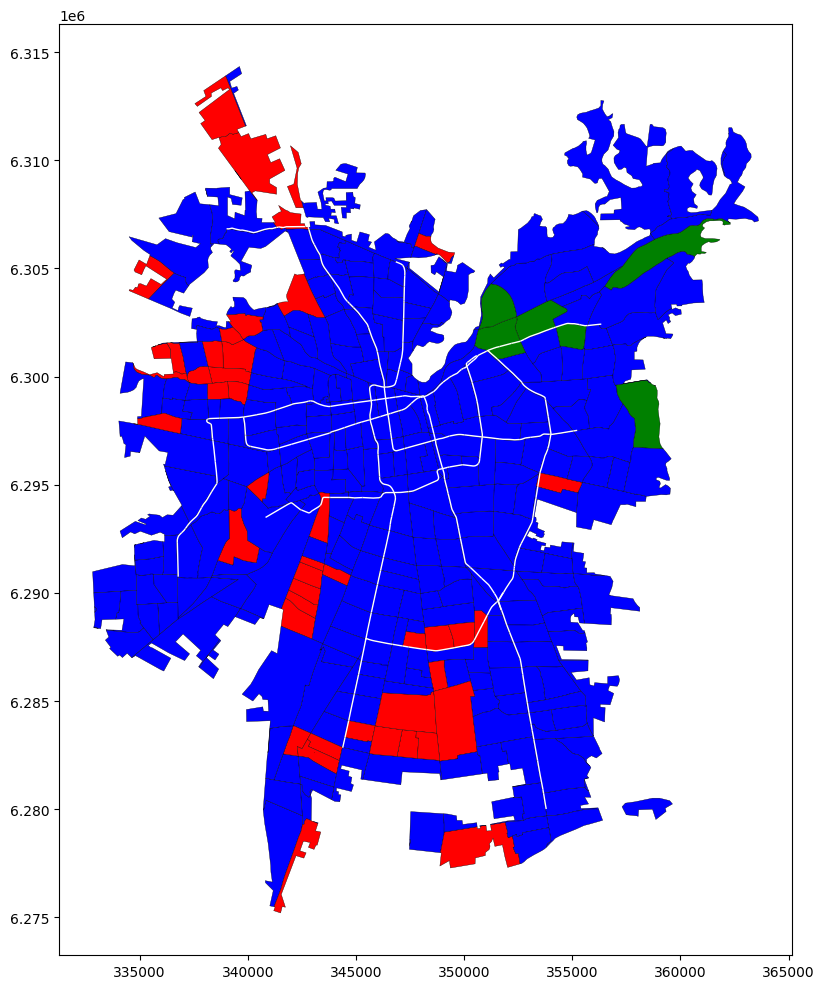

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

distritos_urbano.plot(ax=ax, color=distritos_urbano['nivel_socioeconomico'].map(colors), linewidth=0.25, edgecolor='black')
distritos_urbano_metro = gpd.overlay(distritos_urbano, lineas_metro, how='intersection', keep_geom_type=False)

distritos_urbano_metro.plot(ax=ax, color='white', linewidth=1)

plt.tight_layout()
plt.show()


In [28]:
# ahora debo encontrar las lineas que pasan por un distrito urbano que sea socioeconomicamente alto. Por el solo hecho de que una parte pase, toda esa linea debe ser considerada, por lo tanto, no sería una intersección, sino que una union
distritos_altos = distritos_urbano[distritos_urbano['nivel_socioeconomico'] == 'Alto']
lineas_altas = gpd.overlay(lineas_metro, distritos_altos, how='intersection', keep_geom_type=False)
distritos_urbano_metro = gpd.overlay(distritos_urbano, lineas_altas, how='union', keep_geom_type=False)

In [29]:
lineas_altas.head()

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,NOM_REG,COD_PROV,NOM_PROV,COD_COM,...,ADIMARK_T,Area,Densidad,1_UF_M2,nivel_socioeconomico,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,44,1,L1,14961.079,19600.335826,626.456822,Región Metropolitana De Santiago,131,Santiago,13114,...,8956.0,2843645.97,31.49,40.83,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (351056.070 6301183.276, 351143.671..."
1,46,1,L1,14961.079,19600.335826,620.300458,Región Metropolitana De Santiago,131,Santiago,13114,...,5790.0,2480098.32,23.35,30.37,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (352600.380 6301636.550, 352650.466..."
2,46,1,L1,14961.079,19600.335826,620.300458,Región Metropolitana De Santiago,131,Santiago,13114,...,8956.0,2843645.97,31.49,40.83,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (352188.476 6301534.773, 352230.849..."
3,47,1,L1,14961.079,19600.335826,575.537770,Región Metropolitana De Santiago,131,Santiago,13114,...,8956.0,2843645.97,31.49,40.83,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (351632.437 6301386.232, 352188.476..."
4,48,1,L1,14961.079,19600.335826,1464.406882,Región Metropolitana De Santiago,131,Santiago,13114,...,5790.0,2480098.32,23.35,30.37,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (352776.829 6301721.453, 352793.759..."


In [30]:
lineas_altas.head(2)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,NOM_REG,COD_PROV,NOM_PROV,COD_COM,...,ADIMARK_T,Area,Densidad,1_UF_M2,nivel_socioeconomico,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,44,1,L1,14961.079,19600.335826,626.456822,Región Metropolitana De Santiago,131,Santiago,13114,...,8956.0,2843645.97,31.49,40.83,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (351056.070 6301183.276, 351143.671..."
1,46,1,L1,14961.079,19600.335826,620.300458,Región Metropolitana De Santiago,131,Santiago,13114,...,5790.0,2480098.32,23.35,30.37,Alto,Santiago,Ciudad,427491.444262,5.821041e+08,"LINESTRING (352600.380 6301636.550, 352650.466..."


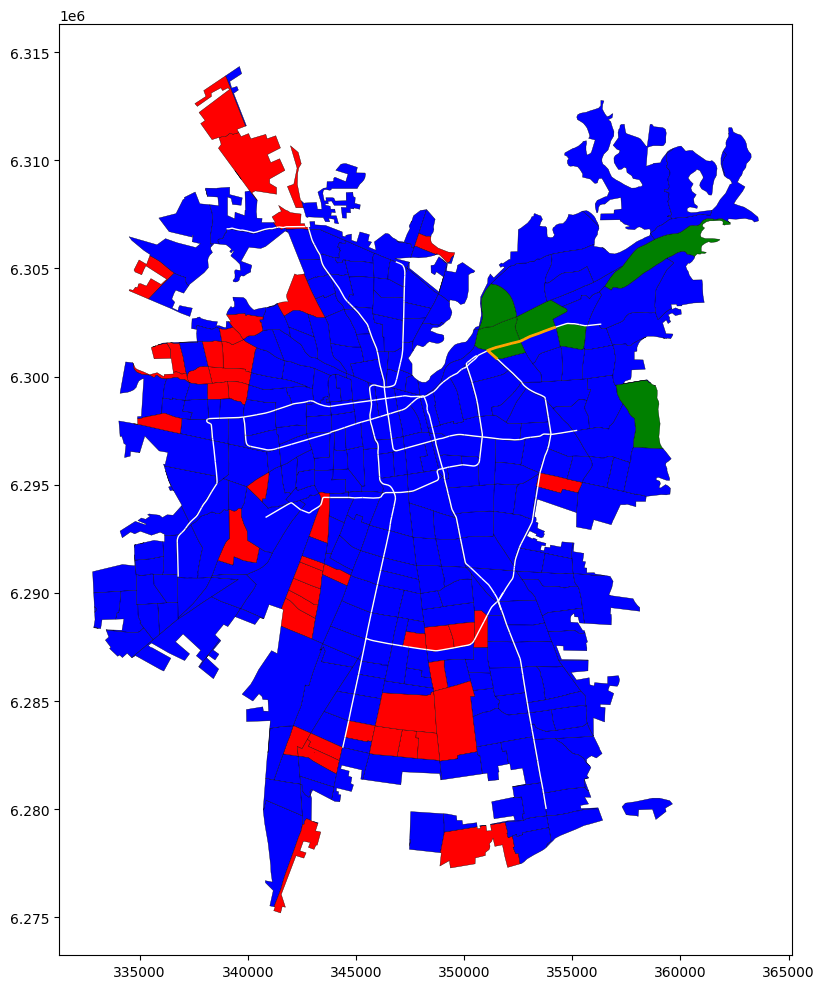

In [31]:
# Ahora visualizamos solo los segmentos de líneas de metro que pasan por distritos altos
# usando la variable "lineas_altas" que ya contiene exactamente esos segmentos

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

distritos_urbano.plot(ax=ax, color=distritos_urbano['nivel_socioeconomico'].map(colors), linewidth=0.25, edgecolor='black')
distritos_urbano_metro = gpd.overlay(distritos_urbano, lineas_metro, how='intersection', keep_geom_type=False)

distritos_urbano_metro.plot(ax=ax, color='white', linewidth=1)
lineas_altas.plot(ax=ax, color='orange', linewidth=2)  # Solo los segmentos que pasan por zonas altas

plt.tight_layout()
plt.show()


# Misión 3

In [32]:
# Cargamos las estaciones de metro
estaciones_metro = gpd.read_file('data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')
estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


In [33]:
# Calculamos los centroides de cada distrito

distritos_con_centroide = distritos.copy()
distritos_con_centroide['centroide'] = distritos_con_centroide.geometry.centroid
distritos_con_centroide.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,nivel_socioeconomico,centroide
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",Medio,POINT (347255.676 6298958.015)
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",Medio,POINT (346388.173 6298891.253)
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",Medio,POINT (345804.699 6298808.712)
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",Medio,POINT (345288.057 6298448.534)
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",Medio,POINT (344391.946 6297945.192)


In [34]:
for i in range (3):
    centroide = distritos_con_centroide.iloc[i]['centroide']
    distrito = distritos_con_centroide.iloc[i]['NOM_DIS']
    print(f"{distrito}: {centroide}")

Huelén: POINT (347255.6762287192 6298958.014618344)
Moneda: POINT (346388.1728040748 6298891.253068904)
Amunátegui: POINT (345804.69896174135 6298808.711881322)


In [35]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
distritos_con_centroide.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
indices_accesibilidad = []

for index, fila in distritos_con_centroide.iterrows():
    centroide = fila['centroide']
    distrito_nombre = fila['NOM_DIS']
    
    # Contamos las estaciones accesibles
    distancias = estaciones_metro.geometry.distance(centroide) # Calcula la distancia de la estacion al centroide del distrito.
    estaciones_accesibles = (distancias <= 1000).sum()
    indices_accesibilidad.append(estaciones_accesibles)

In [38]:
# Agregamos el índice al GeoDataFrame
distritos_con_centroide['indice_accesibilidad'] = indices_accesibilidad

distritos_con_centroide.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,nivel_socioeconomico,centroide,indice_accesibilidad
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",Medio,POINT (347255.676 6298958.015),6
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6...",Medio,POINT (346388.173 6298891.253),7
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6...",Medio,POINT (345804.699 6298808.712),7
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6...",Medio,POINT (345288.057 6298448.534),5
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6...",Medio,POINT (344391.946 6297945.192),5


In [39]:
# Clasificamos en cuatro niveles de accesibilidad, con una función
def clasificar_accesibilidad(indice):
    if indice == 0:
        return 'Sin Acceso'
    elif indice == 1:
        return 'Acceso Bajo'
    elif indice in [2, 3]:
        return 'Acceso Medio'
    else:  # indice >= 4
        return 'Acceso Alto'

# Aplicamos la función de la clasificación
distritos_con_centroide['nivel_accesibilidad'] = distritos_con_centroide['indice_accesibilidad'].apply(clasificar_accesibilidad)

### Visualizamos el resultado que obtuvimos de la RM en un mapa

In [40]:
# Creamos los colores para la accesibilidad, como lo hicimos antes. 
colores_accesibilidad = {
    'Sin Acceso': 'red',        # Rojo 
    'Acceso Bajo': 'orange',       # Naranja
    'Acceso Medio': 'yellow',      # Amarillo
    'Acceso Alto': 'green'        # Verde
}

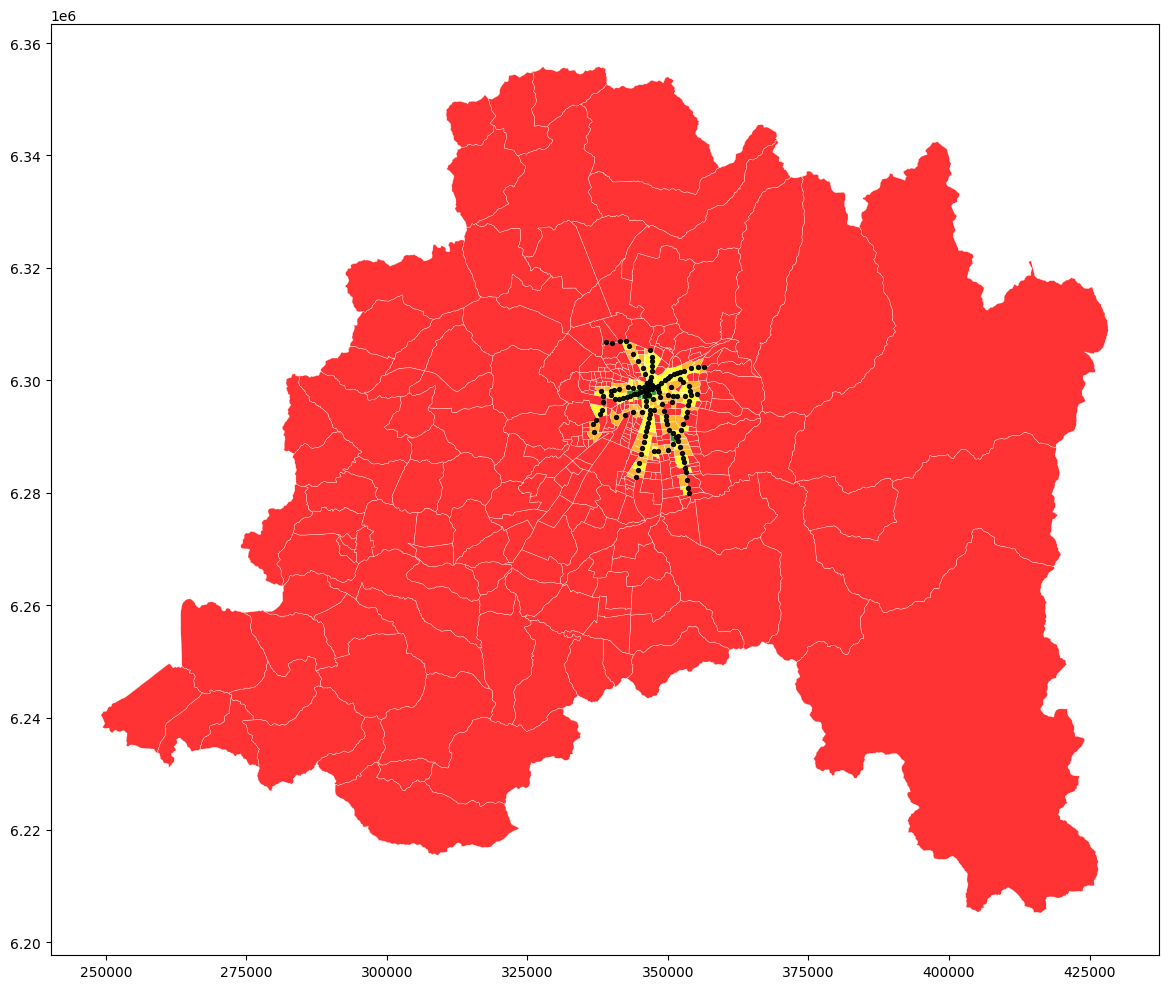

In [41]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots( figsize=(20, 10))

distritos_con_centroide.plot(ax=ax, 
                            color=distritos_con_centroide['nivel_accesibilidad'].map(colores_accesibilidad),
                            linewidth=0.3, edgecolor='white', alpha=0.8)

# Agregamos las estaciones de metro
estaciones_metro.plot(ax=ax, color='black', markersize=8, alpha=0.9, marker='o')


plt.tight_layout()
plt.show()


### Ahora lo visualizamos en un mapa para Santiago

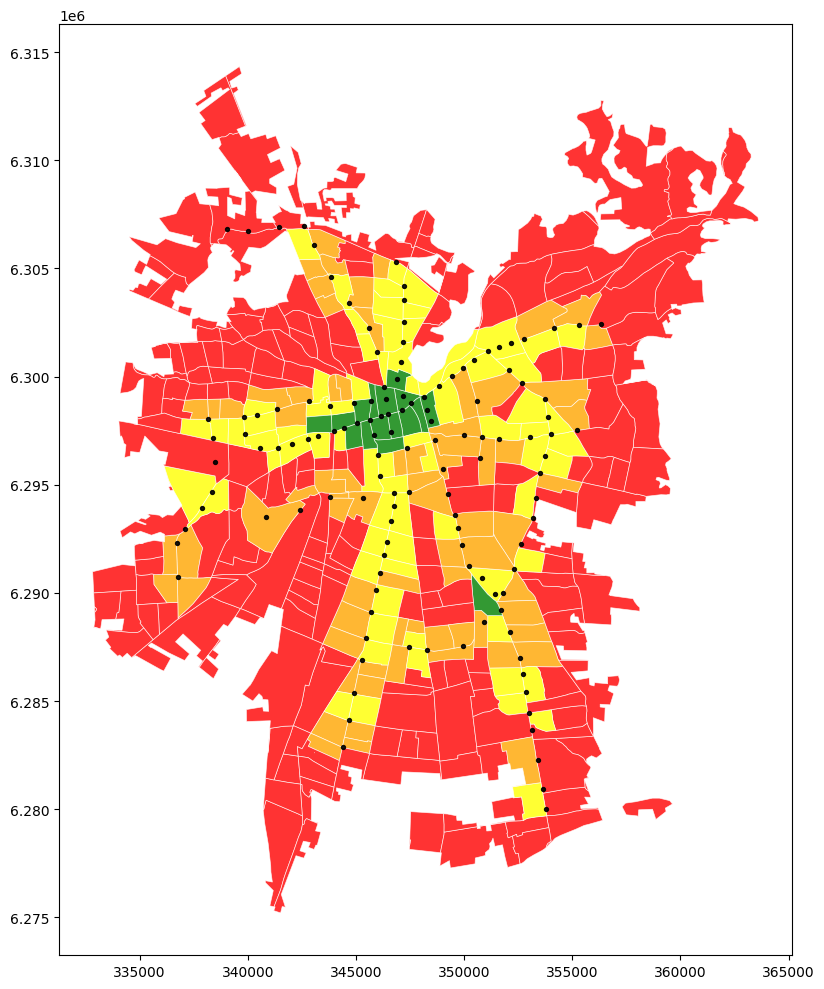

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

# Intersectamos Santiago, 'santiago_urbano' para que solo se vea la accesibilidad en ella usando lo de antes, overlay.
distritos_santiago_urbano = gpd.overlay(distritos_con_centroide, santiago_urbano, how='intersection')

distritos_santiago_urbano.plot(ax=ax, 
                              color=distritos_santiago_urbano['nivel_accesibilidad'].map(colores_accesibilidad),
                              linewidth=0.5, edgecolor='white', alpha=0.8)

# Agregamos las estaciones de metro
estaciones_metro.plot(ax=ax, color='black', markersize=8, alpha=0.9, marker='o')

plt.tight_layout()
plt.show()